In [6]:
import numpy as np
import matplotlib.pyplot as plt

def normal_pdf(x, mu, sigma_sq):
    return (1 / np.sqrt(2 * np.pi * sigma_sq)) * np.exp(-(x - mu)**2 / (2 * sigma_sq))


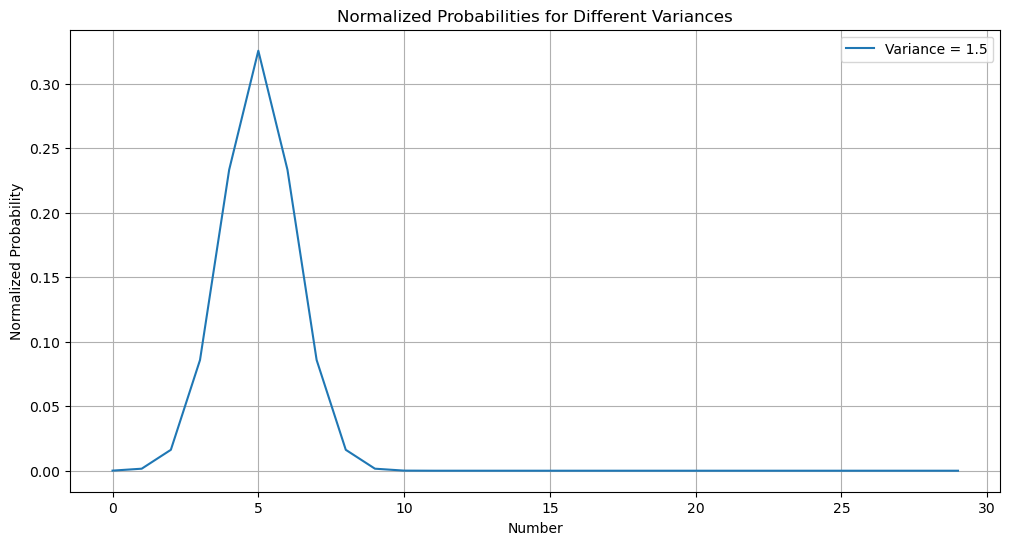

In [19]:
# 다양한 분산 값에 대한 확률 분포를 계산
variances = [1.5]
normalized_probabilities_var = {}

numbers_30 = np.arange(30)
mu_30 = 5

for var in variances:
    pdf_values_var = normal_pdf(numbers_30, mu_30, var)
    total_pdf_var = np.sum(pdf_values_var)
    normalized_probabilities_var[var] = pdf_values_var / total_pdf_var

# 그래프로 결과를 표시
plt.figure(figsize=(12, 6))

for var in variances:
    plt.plot(numbers_30, normalized_probabilities_var[var], label=f'Variance = {var}')

plt.title('Normalized Probabilities for Different Variances')
plt.xlabel('Number')
plt.ylabel('Normalized Probability')
plt.legend()
plt.grid(True)
plt.show()

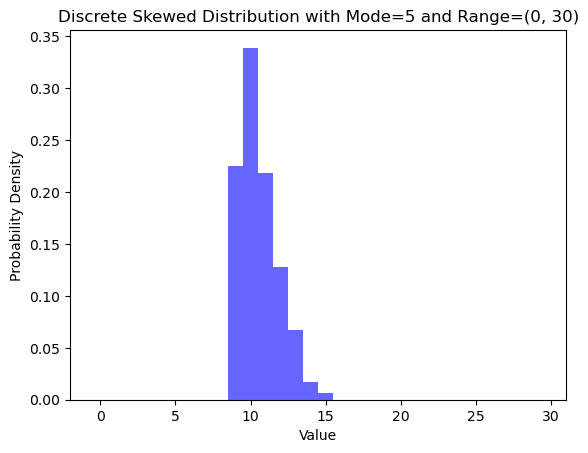

In [36]:

# Define the range and mode
x_range = np.arange(0, 31)

mode = 10  # Mode of the distribution #TODO '
skewness = 20  # Adjust this parameter to control the skewness
scale = 1
#### cal mean ! ####
mean = mode - 1

range_min = 0
range_max = 30
data = skewnorm.rvs(a=skewness, loc=mean, scale=2, size=1000)   #loc가 평균을 의미  ...
data = np.clip(data, range_min, range_max)
# Round the continuous data to convert it to discrete values
discrete_data = np.round(data).astype(int)

# Clip data to fit within the desired range (0, 30)
discrete_data = np.clip(discrete_data, range_min, range_max)

# Plot the histogram for the discrete distribution
plt.hist(discrete_data, bins=range(range_min, range_max + 1), density=True, alpha=0.6, color='b', align='left')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Discrete Skewed Distribution with Mode=5 and Range=(0, 30)')
plt.show()

# def calculate_weights(x, N):
#     return (x/N)**2 * np.exp(-0.1 * (x - N)**2)

# # Calculate weights
# weights = calculate_weights(x_range, N)

# # Normalize the weights to make them probabilities
# weights = weights / np.sum(weights)

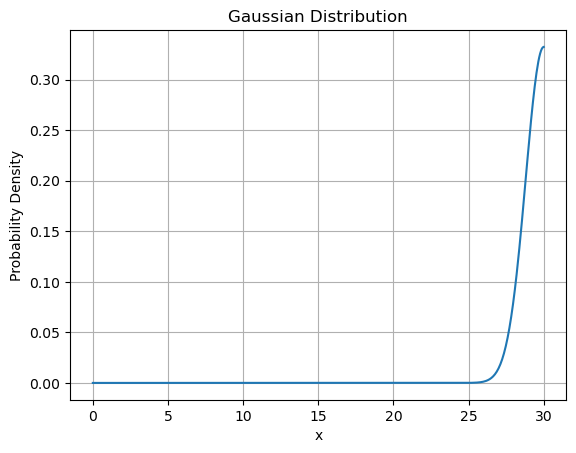

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# 가우시안 함수
def gaussian(x, mu, sigma):
    return (1.0 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

def main():
    # 평균과 표준편차 설정
    mean_value = int(input())  # 예시 값
    std_dev = 1.2     # 예시 값

    # x 값 범위 설정
    x = np.linspace(0, 30, 500)

    # 가우시안 함수 계산
    y = gaussian(x, mean_value, std_dev)

    # 그래프 그리기
    plt.plot(x, y)
    plt.title("Gaussian Distribution")
    plt.xlabel("x")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.show()
    
main()

========== mean : 1 ==========


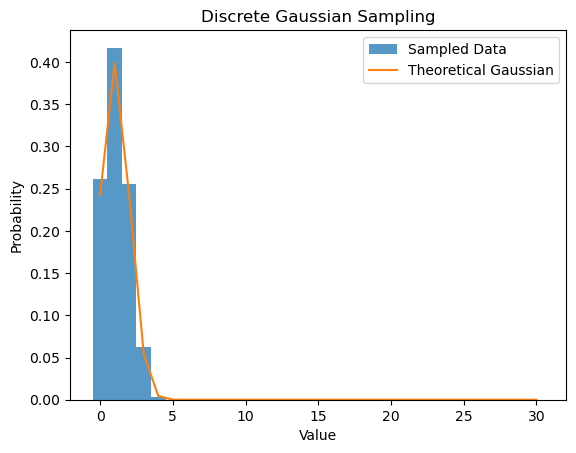

0 1 2 0 0 2 1 1 2 2 0 0 1 2 1 
========== mean : 5 ==========


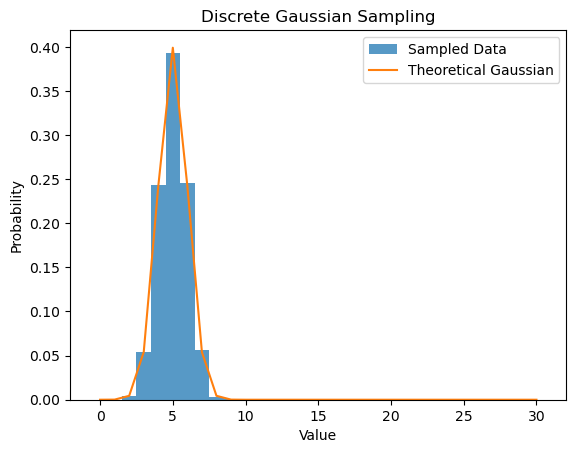

6 5 6 5 5 4 4 6 4 6 4 6 5 6 5 
========== mean : 10 ==========


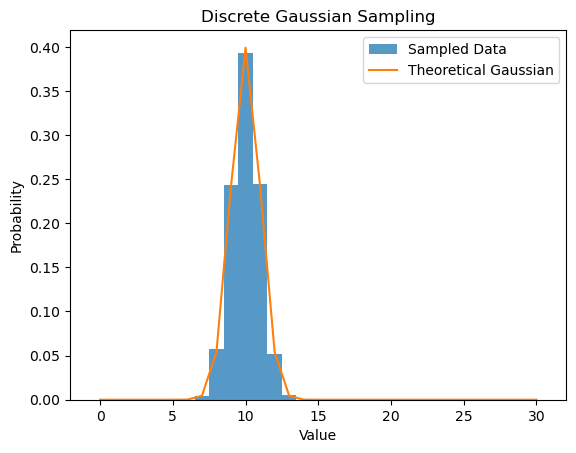

10 10 9 9 10 10 9 10 12 11 8 8 9 10 9 
========== mean : 15 ==========


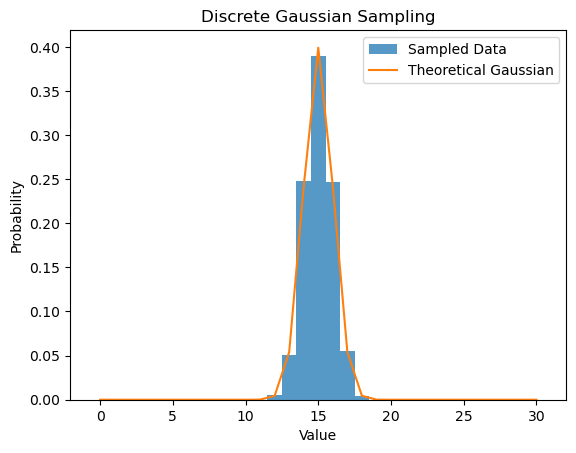

15 15 18 15 13 14 14 16 15 14 14 14 14 15 17 
========== mean : 20 ==========


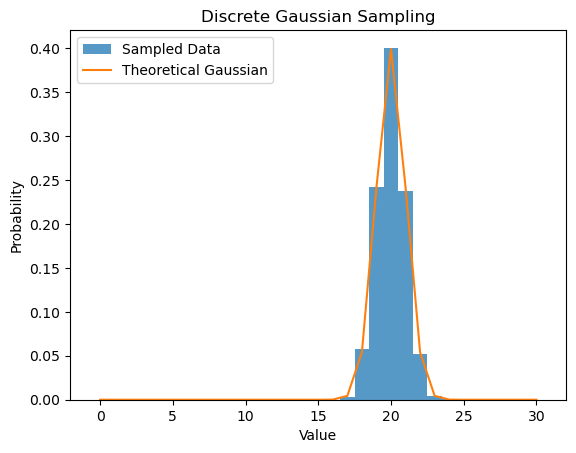

20 21 19 20 20 18 19 20 19 20 18 20 17 20 21 
========== mean : 25 ==========


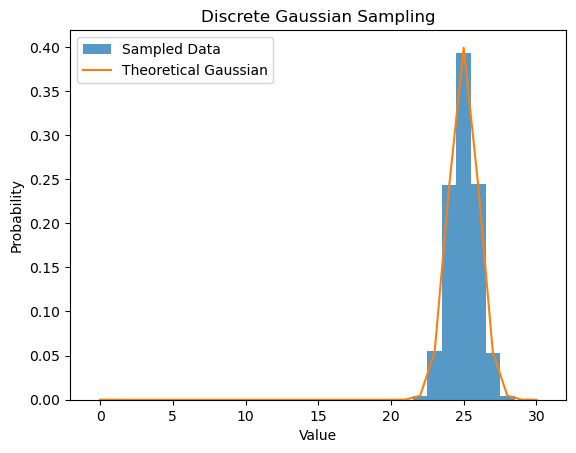

24 27 26 25 27 26 25 25 25 25 26 25 24 25 24 
========== mean : 30 ==========


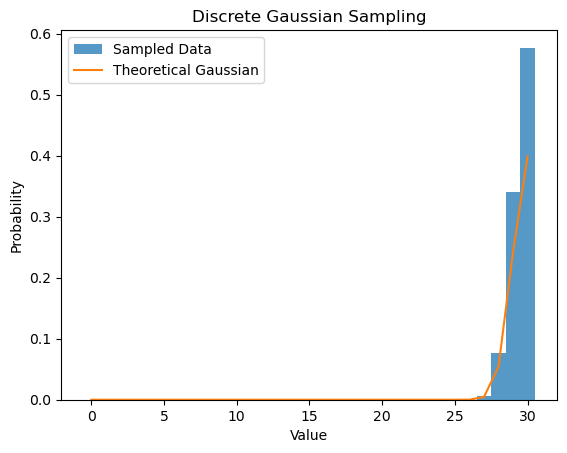

30 30 30 29 29 30 30 29 30 30 30 30 30 30 30 


In [57]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return (1.0 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

def sample_discrete_gaussian(mean_value, std_dev=1.5, lower_bound=0, upper_bound=30):
    x = np.arange(lower_bound, upper_bound+1)
    y = gaussian(x, mean_value, std_dev)
    sampled_value = np.random.choice(x, p=y/np.sum(y))
    return sampled_value

def visuatlize_gaussian(mean, std):
    num_samples = 10000
    samples = [sample_discrete_gaussian(mean, std) for _ in range(num_samples)]

    plt.hist(samples, bins=np.arange(0, 32) - 0.5, density=True, alpha=0.75, label='Sampled Data')

    x = np.arange(0, 31)
    y = gaussian(x, mean, std)
    plt.plot(x, y, label='Theoretical Gaussian')

    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.title('Discrete Gaussian Sampling')
    plt.legend()
    plt.show()

def example_gaussian():
    std = 5
    meanList = [1, 5, 10, 15, 20, 25, 30]
    for mean in meanList :
        print("========== mean :", mean, "==========")
        visuatlize_gaussian(mean, std)
        for i in range(15) :
            print(sample_discrete_gaussian(mean, std), end=" ")
        print()

example_gaussian()

In [83]:
import numpy as np
import random

# 이산 가우시안 확률을 계산하는 함수
def discrete_gaussian_prob(mean_value, std_dev=1, lower_bound=0, upper_bound=30):
    x = np.arange(lower_bound, upper_bound + 1)
    y = (1.0 / np.sqrt(2 * np.pi * std_dev ** 2)) * np.exp(-((x - mean_value) ** 2) / (2 * std_dev ** 2))
    return y / np.sum(y)

# Q-table의 예 (랜덤하게 초기화)
Q_table = np.random.rand(31)
min_val = np.min(Q_table)
max_val = np.max(Q_table)
normalized_Q_table = (Q_table - min_val) / (max_val - min_val)

# 평균 값 (예를 들어, 15)
mean_value = 15

# 가우시안 분포의 확률 계산
gaussian_prob = discrete_gaussian_prob(mean_value)

# Q-value와 가우시안 확률을 결합 (예를 들어, 각각에 대해 0.5의 가중치를 적용)
weight = 0.9
combined_prob = (1-weight) * normalized_Q_table / np.max(normalized_Q_table) + weight * gaussian_prob

g = np.argmax(gaussian_prob)
q = np.argmax(Q_table)
print("gaussian", g, "Qtable", q)
c = np.argmax(combined_prob)
print("combine", c)

for _ in range(15) :
    optimal_value = np.random.choice(np.arange(0, 31), p=combined_prob / np.sum(combined_prob))
    print("Sampled optimal value:", optimal_value)



gaussian 15 Qtable 11
combine 15
Sampled optimal value: 4
Sampled optimal value: 16
Sampled optimal value: 1
Sampled optimal value: 14
Sampled optimal value: 26
Sampled optimal value: 5
Sampled optimal value: 14
Sampled optimal value: 21
Sampled optimal value: 15
Sampled optimal value: 14
Sampled optimal value: 3
Sampled optimal value: 15
Sampled optimal value: 16
Sampled optimal value: 0
Sampled optimal value: 14


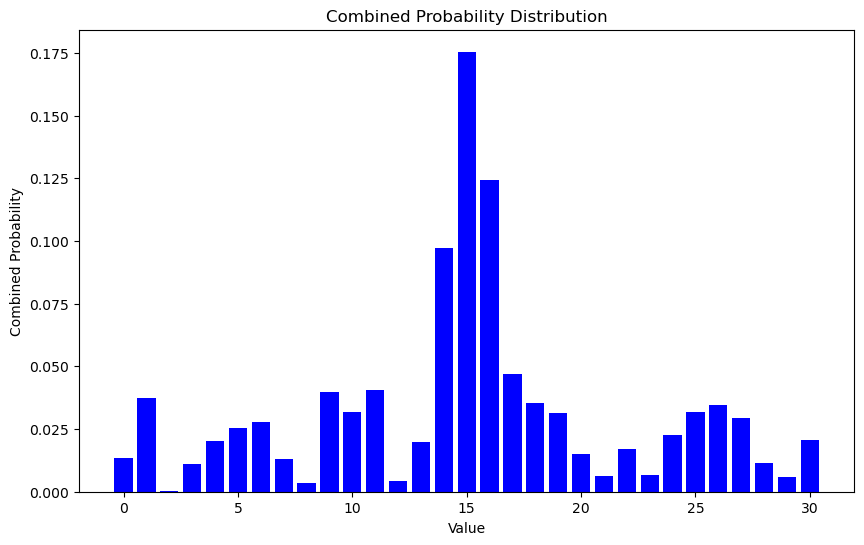

In [84]:
combined_prob = combined_prob / np.sum(combined_prob)

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0, 31), combined_prob, color='blue')
plt.xlabel('Value')
plt.ylabel('Combined Probability')
plt.title('Combined Probability Distribution')
plt.show()